---
format: 
  typst:
    logo:
      width: 1in
      location: right-top
echo: false
---

In [1]:
city = "Corvallis"

In [2]:
# Injected Parameters
city = "Keizer"


In [3]:
from IPython.display import Markdown
Markdown(f"# {city}")

# Keizer

In [4]:
import polars as pl
from plotnine import *
from datetime import date
from calendar import month_name, month_abbr
from brand_yml import Brand
from pyfonts import load_google_font

In [5]:
brand = Brand.from_yaml("")

In [6]:
this_month = date(2025, 5, 1)
highlight_color = brand.color.secondary  # A bright color for highlighting
brand_theme = theme(
    text=element_text(
        fontproperties=load_google_font(
            brand.typography.base.family, brand.typography.base.weight
        ),
        color=brand.color.foreground,
        size=14,
    )
)

In [7]:
tmean_oregon = pl.read_csv("data/tmean-oregon.csv", schema_overrides={"date": pl.Date})
tmean = tmean_oregon.filter(
    pl.col("city") == city,
)

In [8]:
#| include: false

tmean.head()

city,date,tmean,month,year,tmean_normal,tmean_diff,tmean_direction
str,date,f64,i64,i64,f64,f64,str
"""Keizer""",2025-05-01,14.122601,5,2025,13.7908,0.3318,"""warmer"""
"""Keizer""",2025-04-01,11.831749,4,2025,10.320499,1.51125,"""warmer"""
"""Keizer""",2025-03-01,9.29855,3,2025,8.227099,1.07145,"""warmer"""
"""Keizer""",2025-02-01,5.2999,2,2025,6.3764,1.0765,"""cooler"""
"""Keizer""",2025-01-01,4.2327,1,2025,5.2641,1.0314,"""cooler"""


In [9]:
this = tmean.filter(pl.col("date") == this_month).row(0, named=True)
Markdown(f"{month_name[this['month']]} {this['year']} was {abs(this['tmean_diff']):.1f}°C {this['tmean_direction']} than usual.")

May 2025 was 0.3°C warmer than usual.

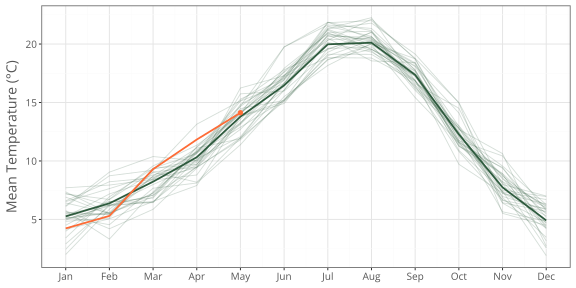

In [10]:
(
    ggplot(tmean, aes(x="month", y="tmean"))
    + geom_line(aes(group="year"), alpha=0.2, color=brand.color.primary)
    + geom_line(aes(y = "tmean_normal"), color=brand.color.primary, size = 1)
    + geom_line(data=tmean.filter(pl.col("year") == 2025), color=highlight_color, size = 1)
    + geom_point(
        data=tmean.filter(pl.col("date") == this_month), color=highlight_color, size = 2
    )
    + scale_x_continuous(breaks=list(range(1, 13)), labels=list(month_abbr[1:]))
    + labs(x="", y="Mean Temperature (°C)")
    + theme_bw() 
    + brand_theme
    + theme(figure_size = (8, 4))
)